In [3]:
import json
import os
import sys
cwd = os.getcwd()
sys.path.append(cwd[:-15])

from Frequency.Broadband import Signal
import numpy as np
import pandas as pd
import re


In [13]:

cwd = os.getcwd()

all_results_path = cwd[:-14] + "Full Simulation/Simulation Results/FuPt-closed/" 

data_dict = {"Signal Bandwidth [THz]": [], "Width Iron [nm]":[], "Width Platinum [nm]":[], "Laser Pulse Time [fs]": []}

num_pattern = r"W(\d)-(\d)-L(\d*)"

for dirpath, dirs, files in os.walk(all_results_path):
    # print(dirpath)
    for f in files:
        if f[-4:] == "json":
            f_path = dirpath + "/" + f
            
            with open(f_path, "r") as j_object:
                results = json.load(j_object)

            m = re.search(num_pattern, results["name"])
            # print(results["name"])#, match[1], match[2])
            W1, W2, L = m.group(1,2,3)
            BW = results["broadband"]
            data_dict["Signal Bandwidth [THz]"].append(BW)
            data_dict["Width Iron [nm]"].append(W1)
            data_dict["Width Platinum [nm]"].append(W2)
            data_dict["Laser Pulse Time [fs]"].append(L)
            
df = pd.DataFrame.from_dict(data_dict)
print(df)

    Signal Bandwidth [THz] Width Iron [nm] Width Platinum [nm]  \
0                 8.833333               5                   2   
1                 8.666667               5                   4   
2                 8.833333               6                   2   
3                27.833333               5                   2   
4                 8.833333               4                   5   
..                     ...             ...                 ...   
67               25.333333               6                   6   
68               13.833333               4                   5   
69               26.333333               3                   4   
70               25.166667               5                   4   
71               13.666667               6                   4   

   Laser Pulse Time [fs]  
0                    100  
1                    100  
2                    100  
3                     30  
4                    100  
..                   ...  
67                

/home/hjaleta/spin_project/Frequency/Broadband.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


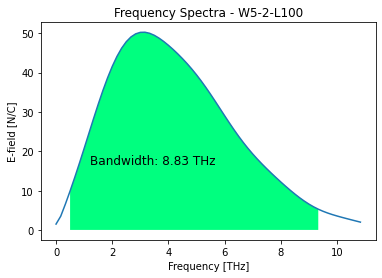

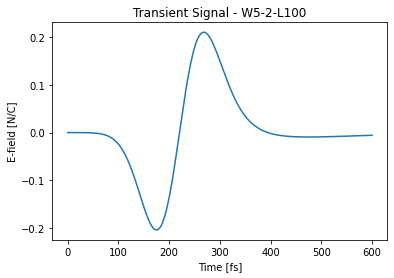

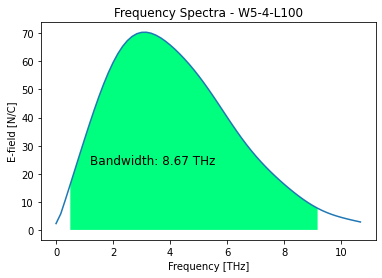

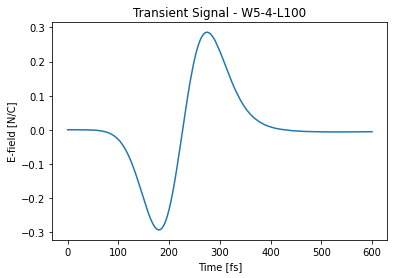

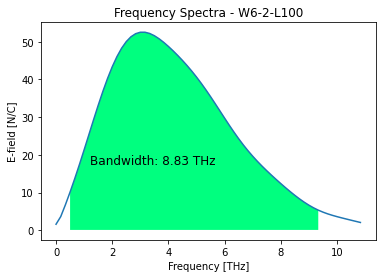

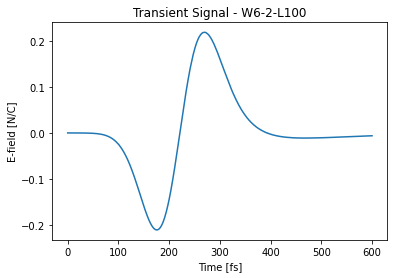

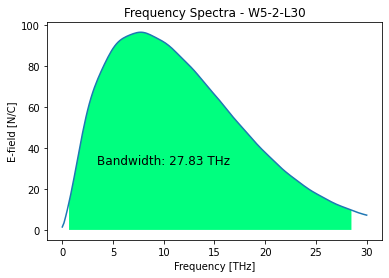

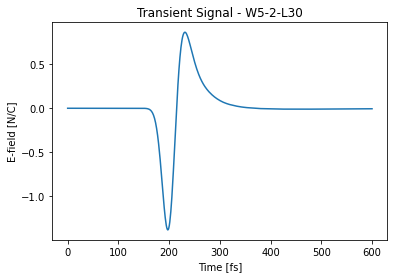

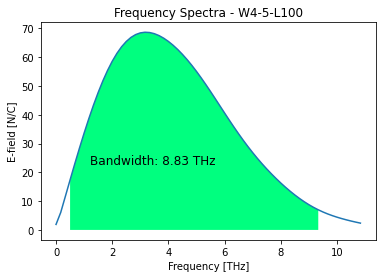

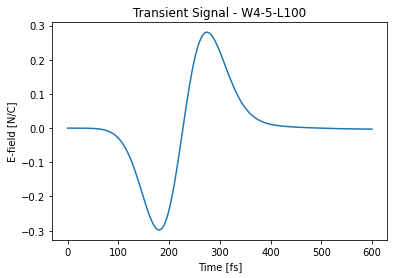

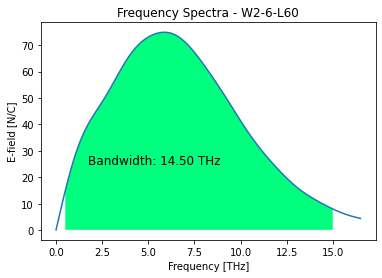

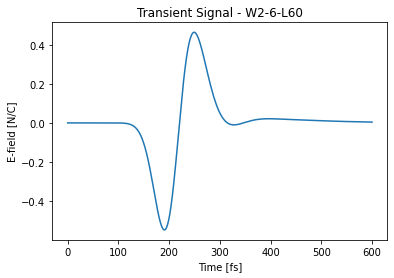

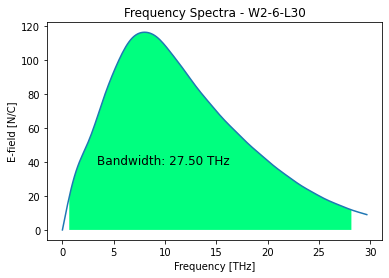

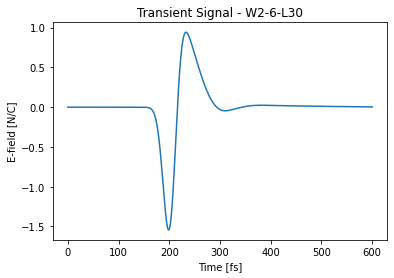

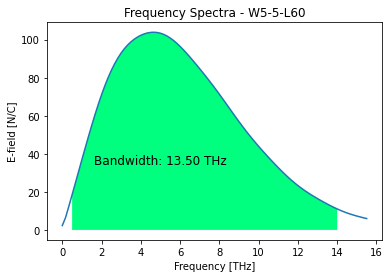

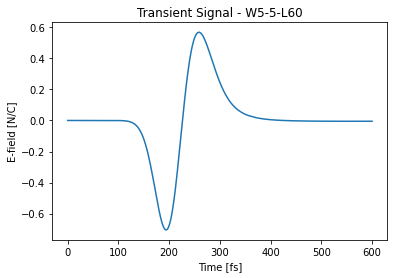

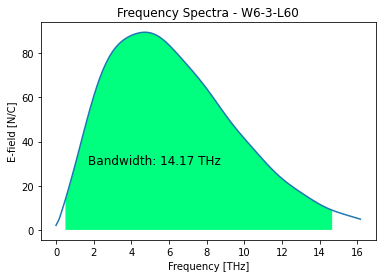

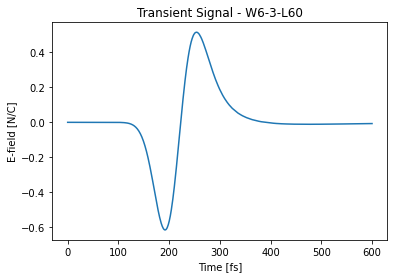

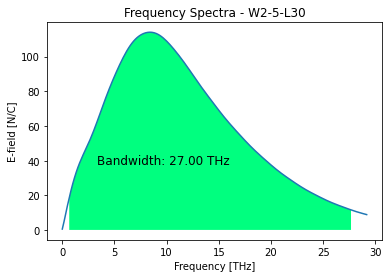

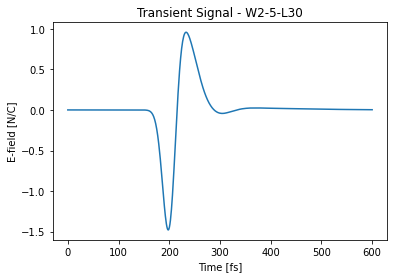

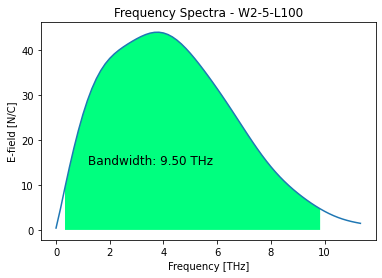

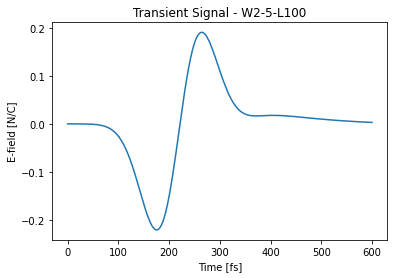

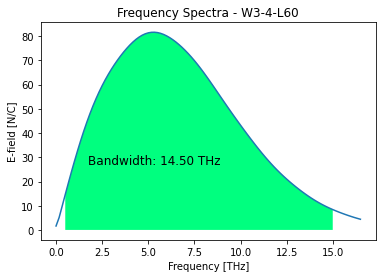

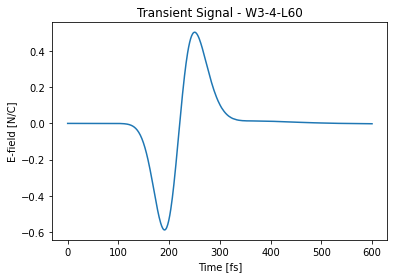

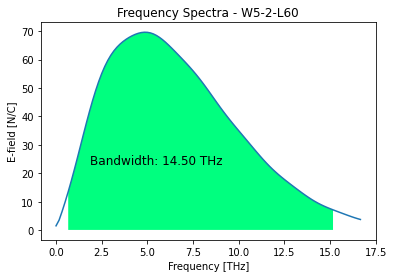

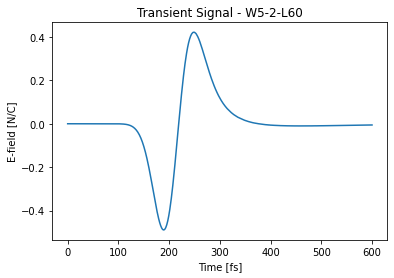

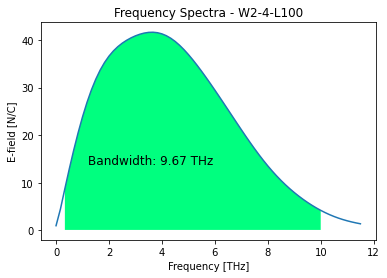

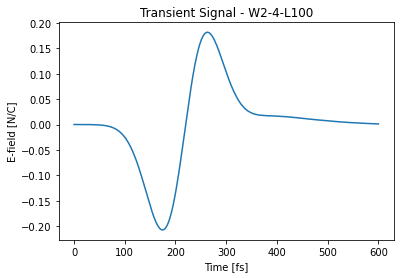

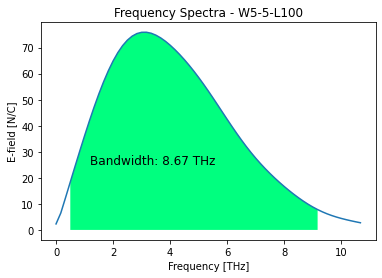

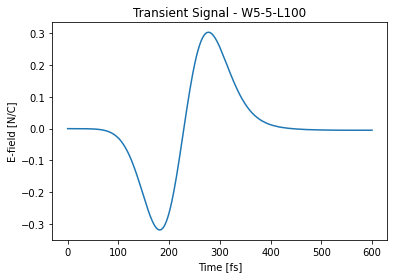

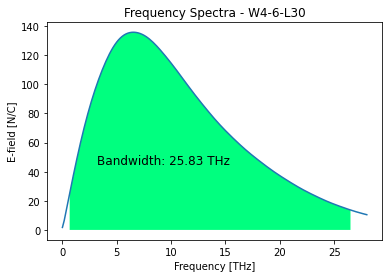

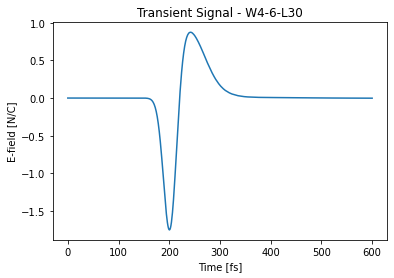

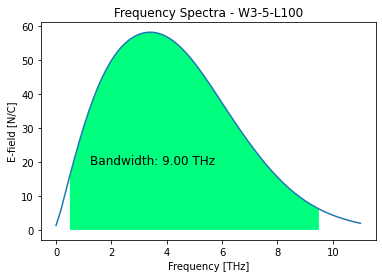

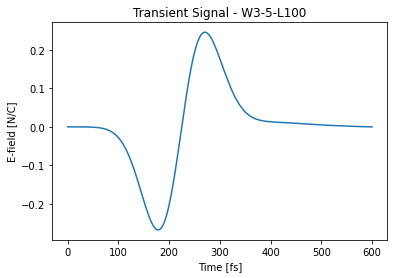

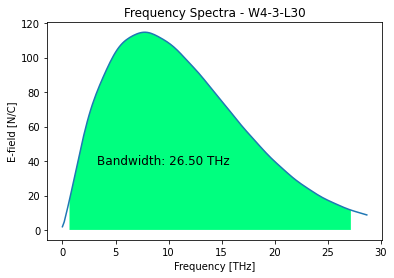

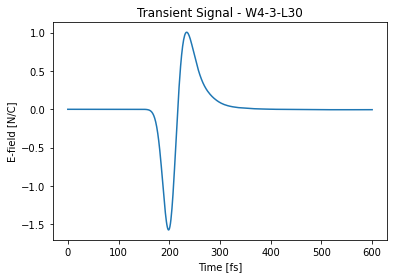

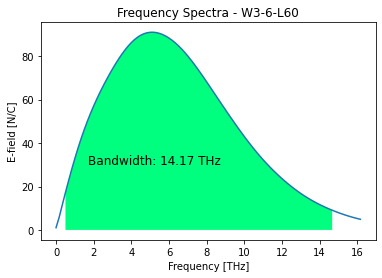

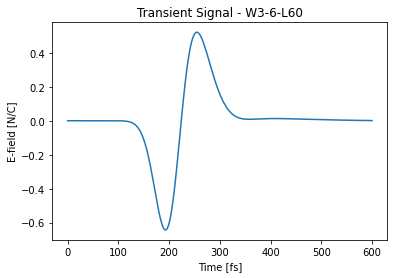

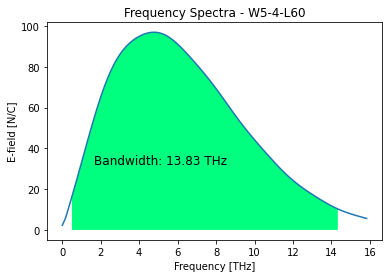

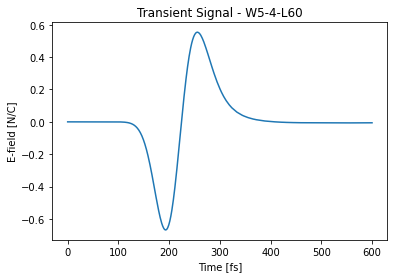

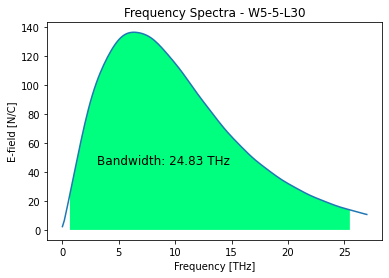

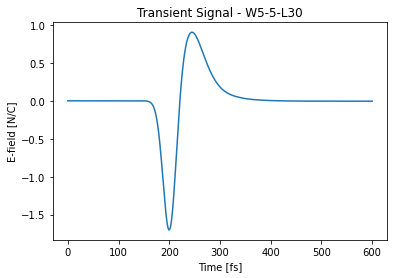

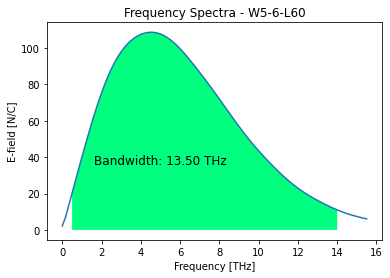

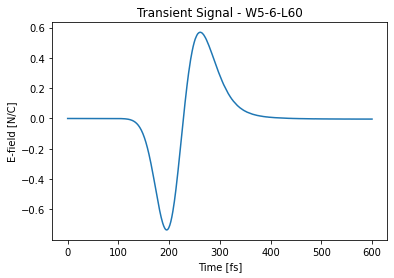

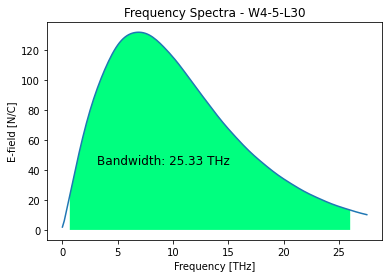

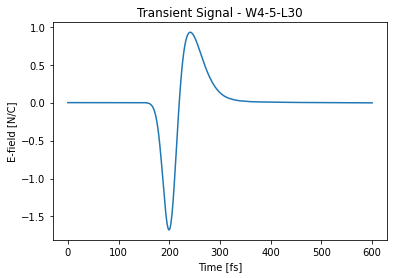

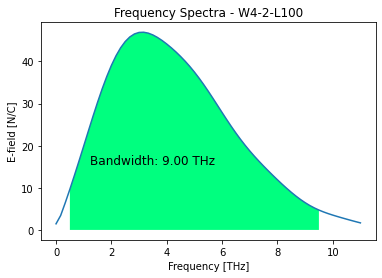

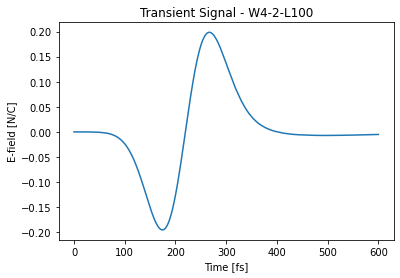

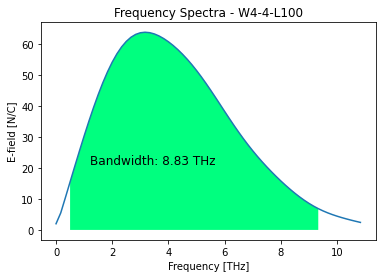

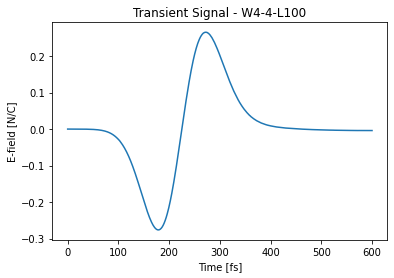

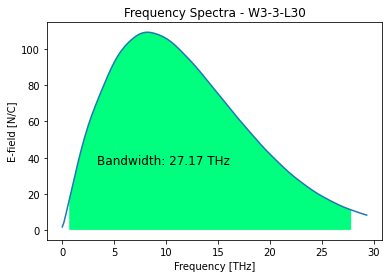

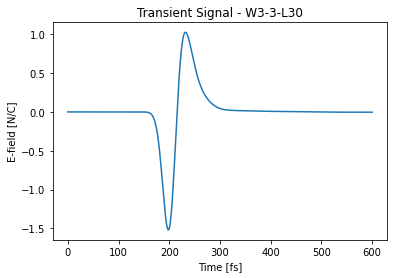

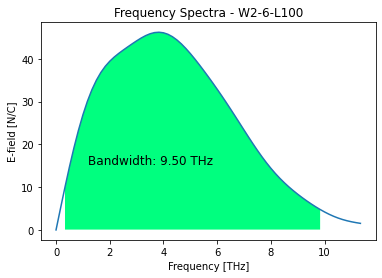

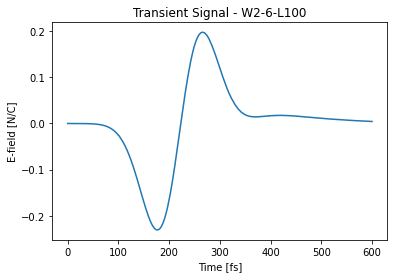

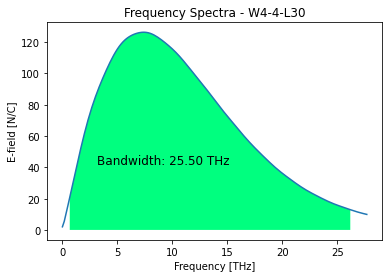

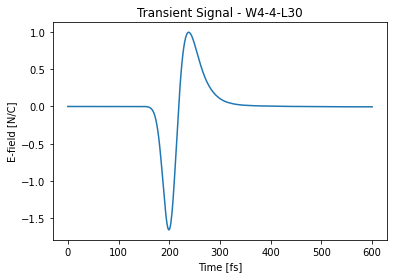

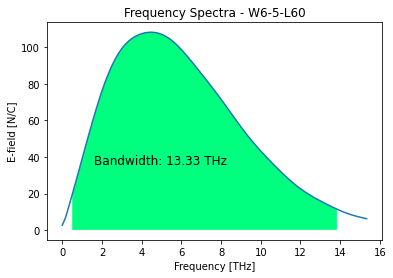

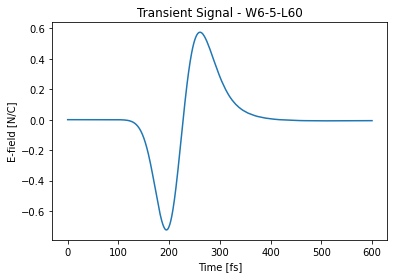

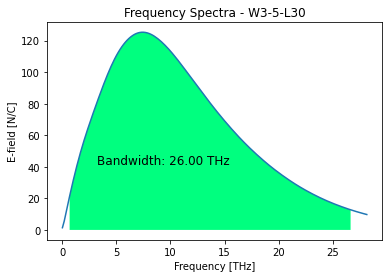

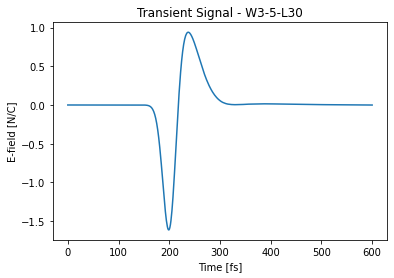

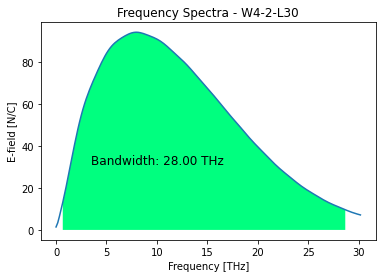

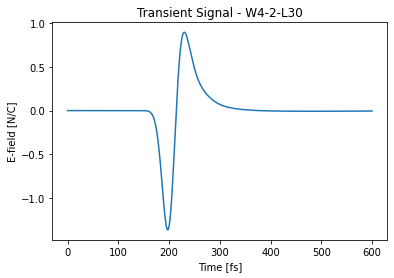

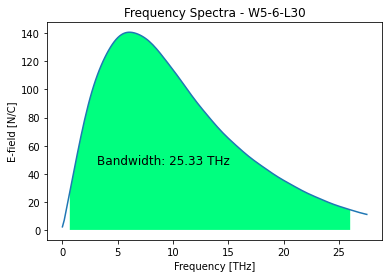

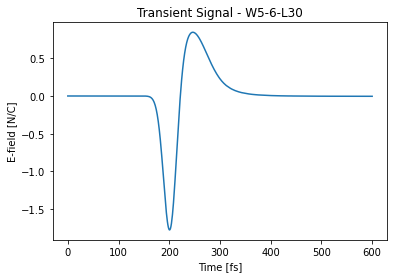

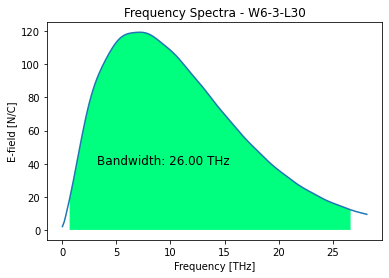

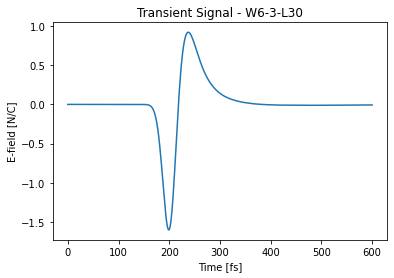

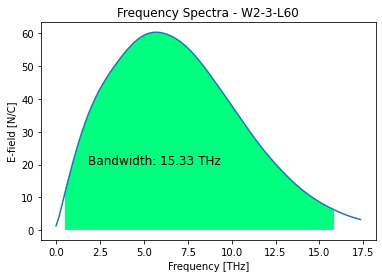

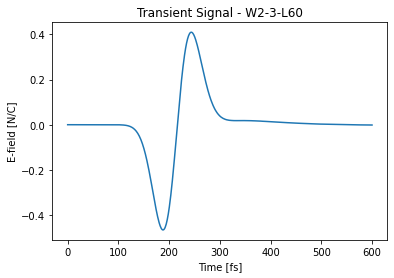

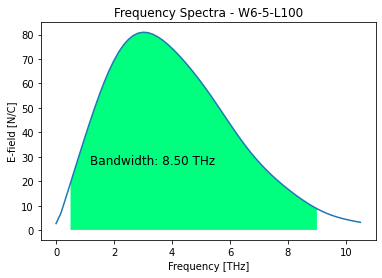

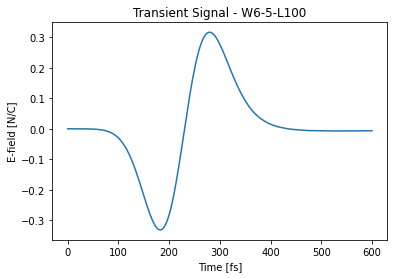

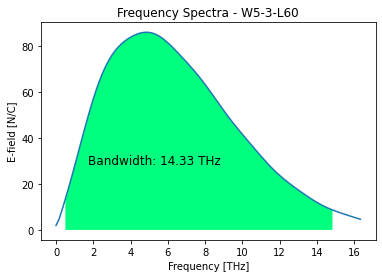

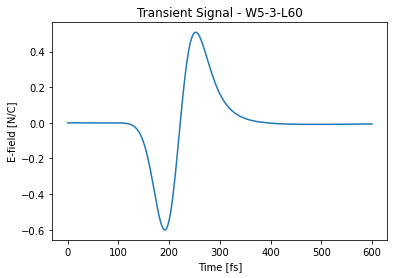

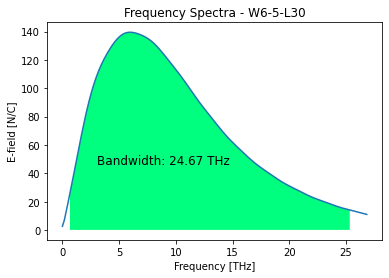

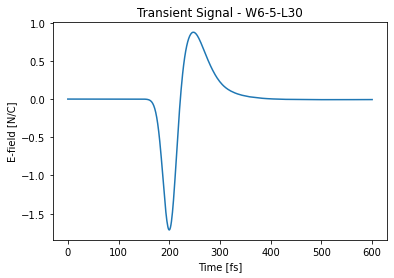

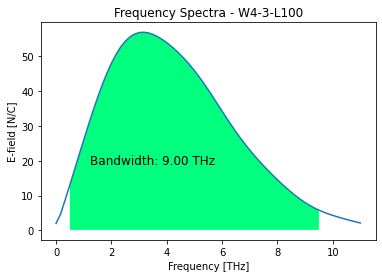

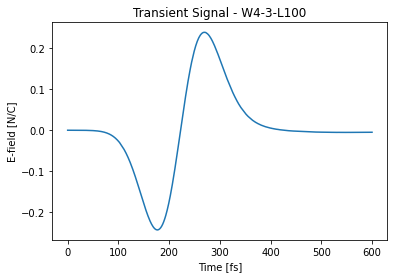

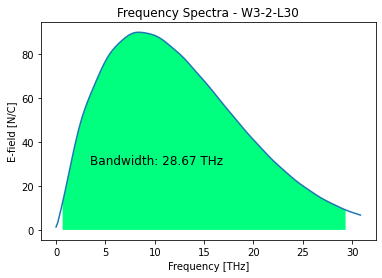

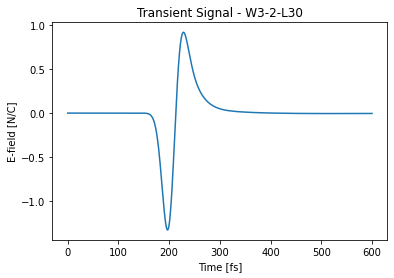

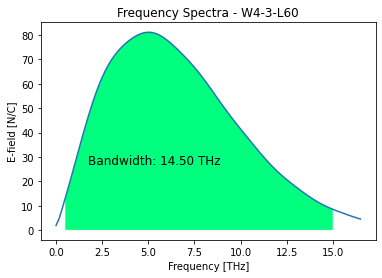

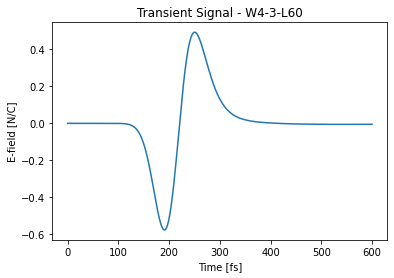

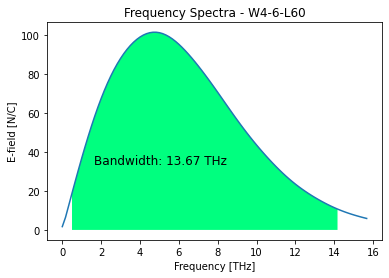

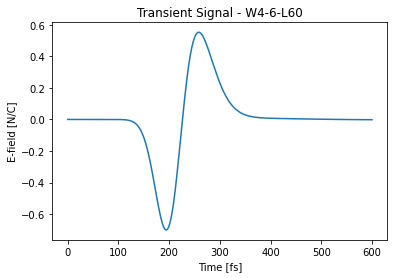

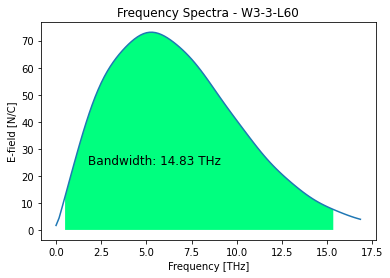

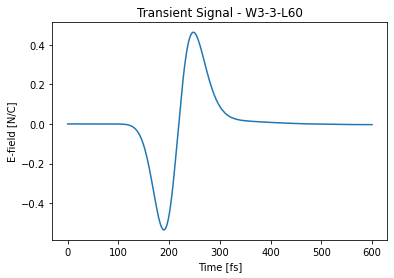

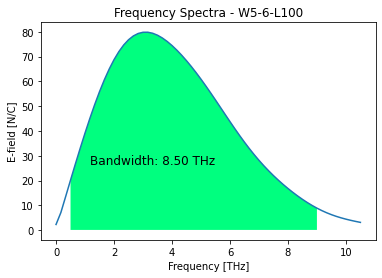

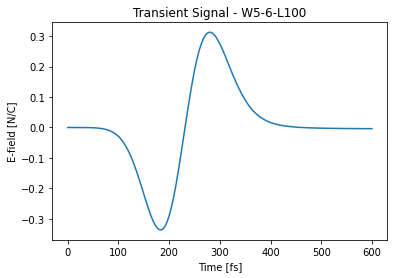

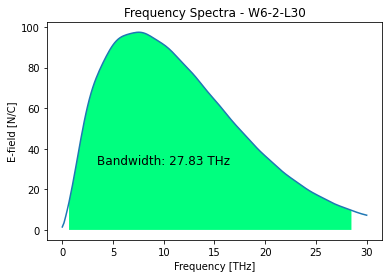

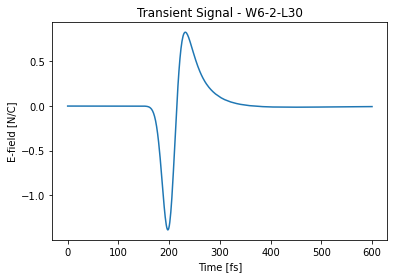

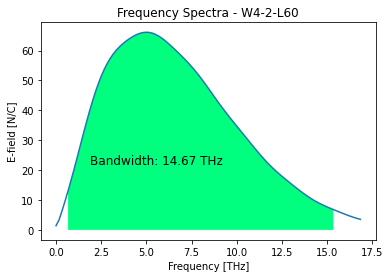

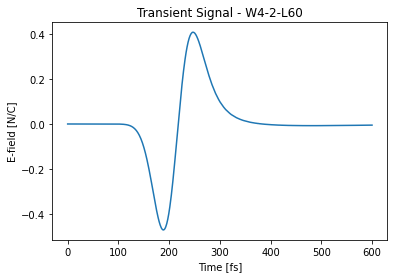

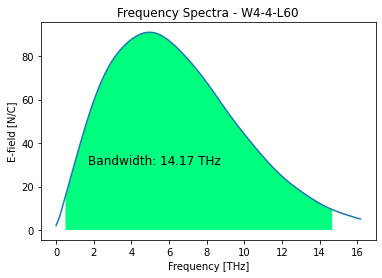

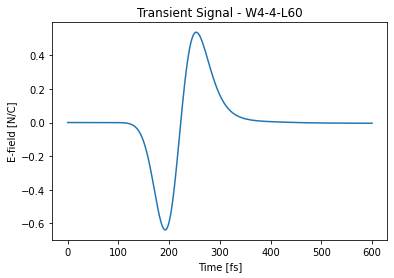

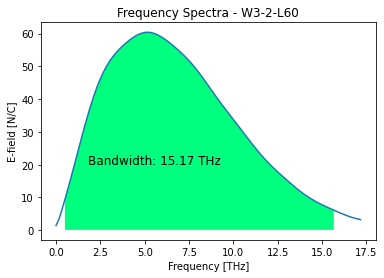

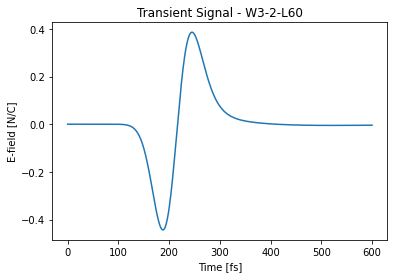

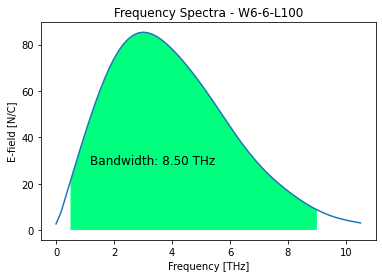

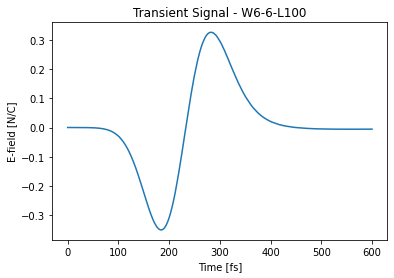

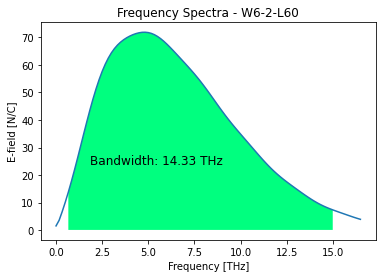

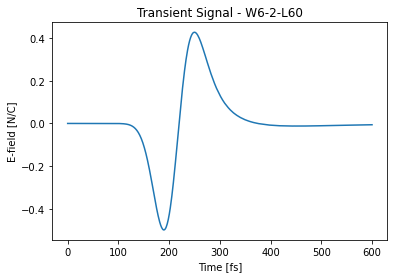

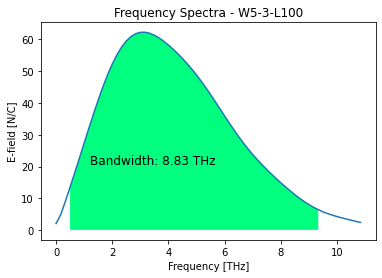

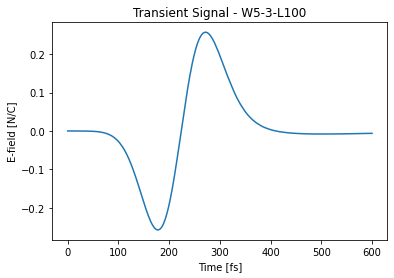

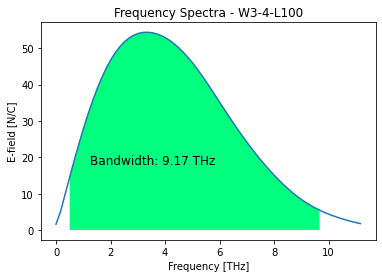

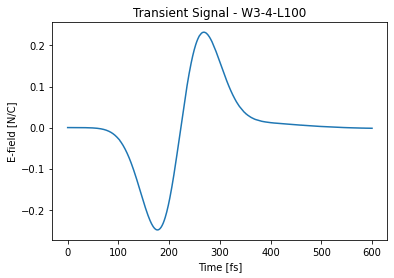

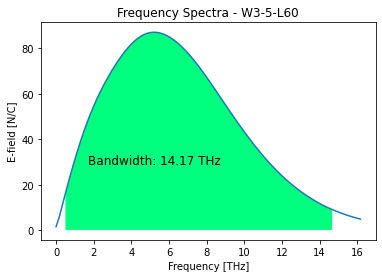

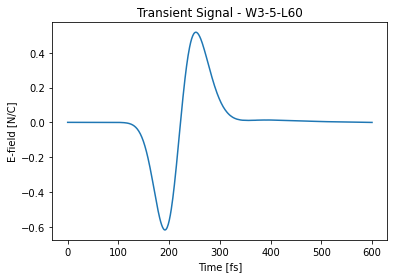

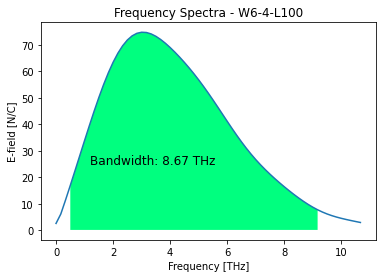

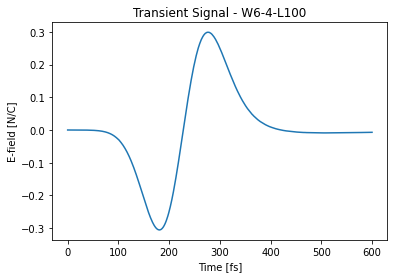

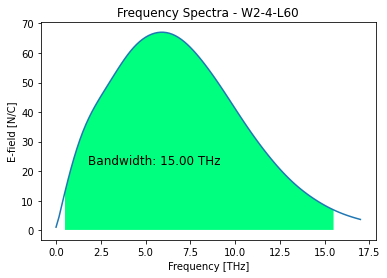

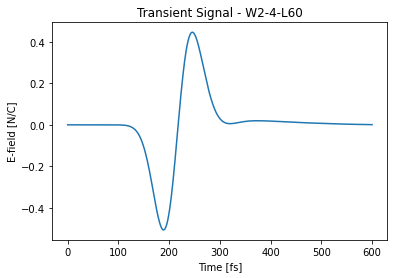

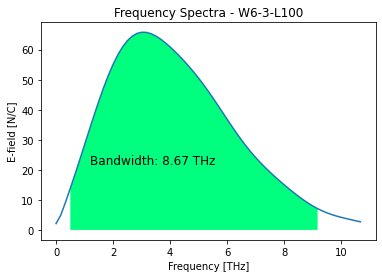

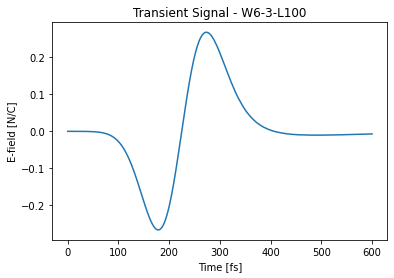

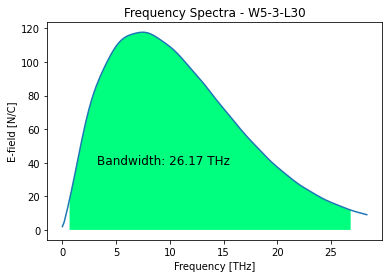

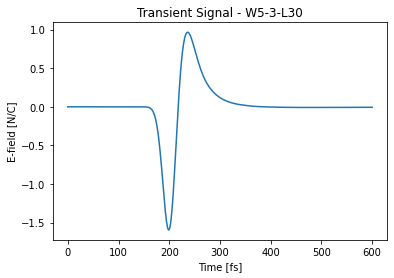

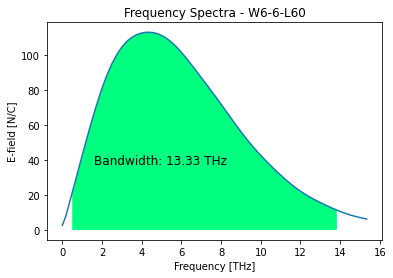

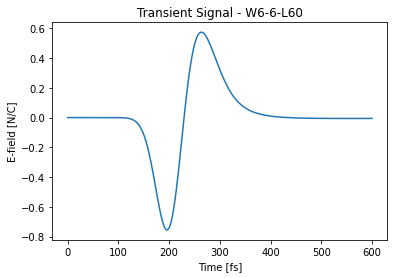

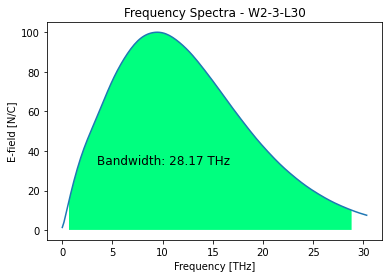

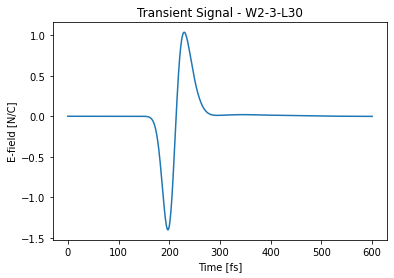

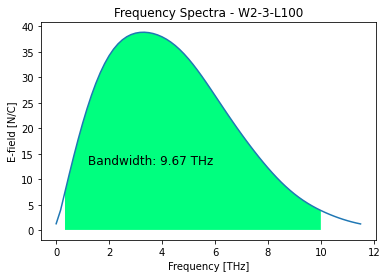

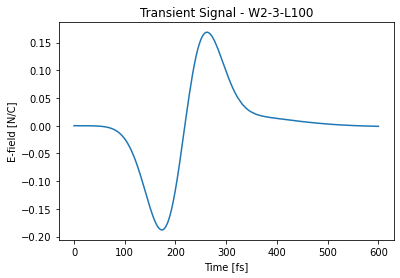

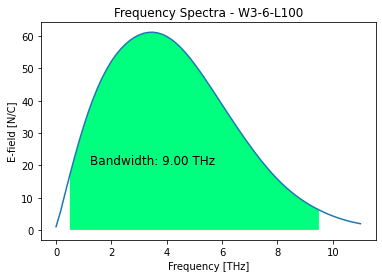

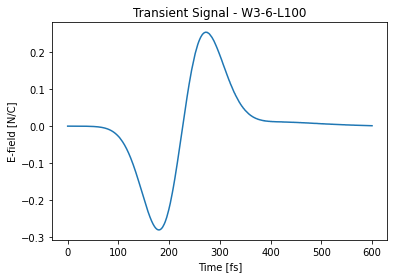

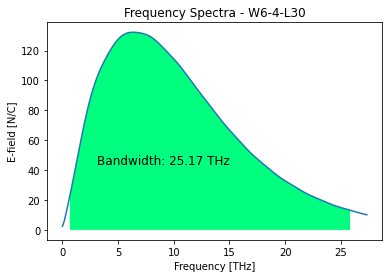

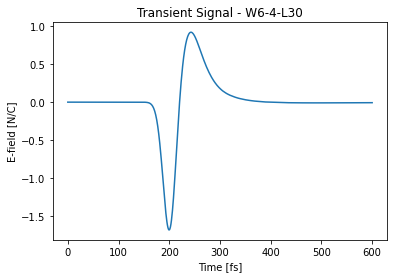

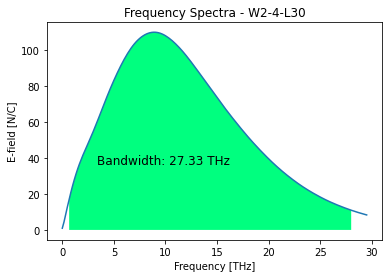

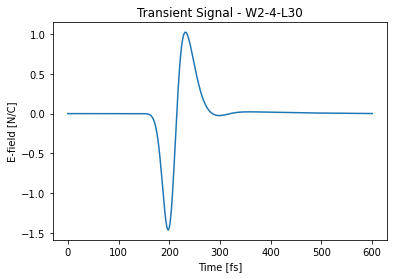

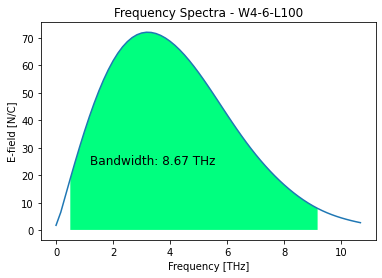

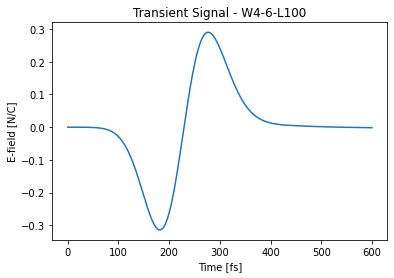

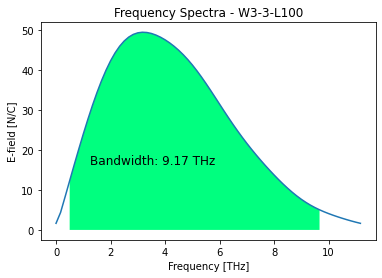

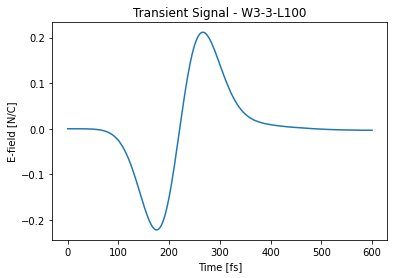

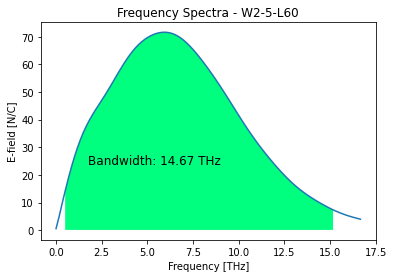

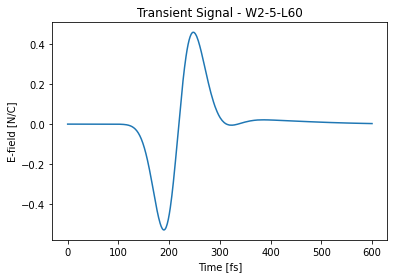

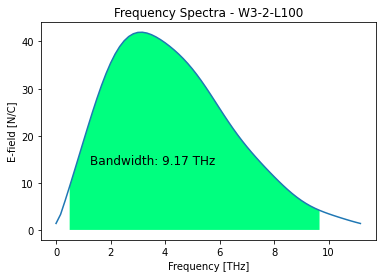

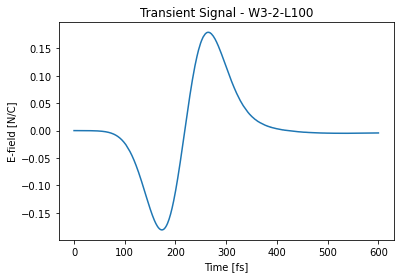

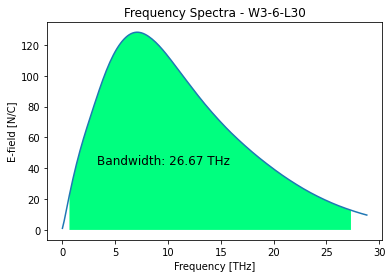

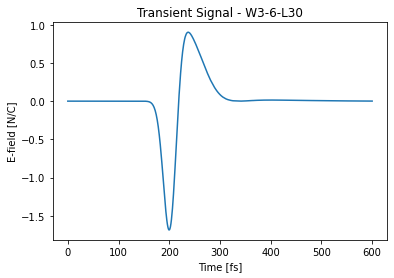

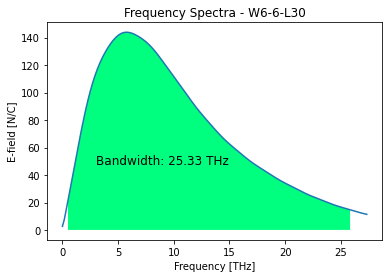

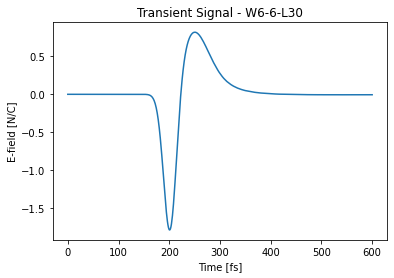

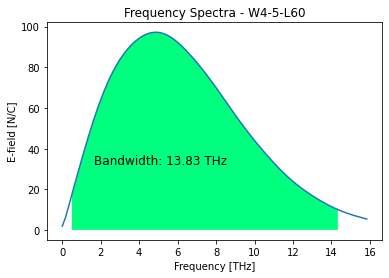

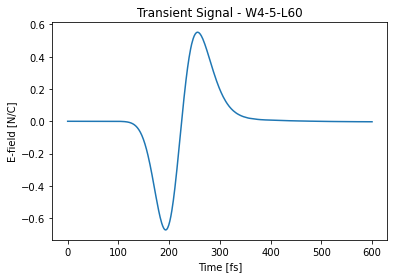

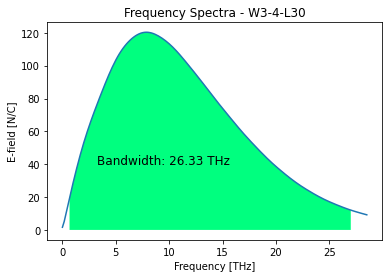

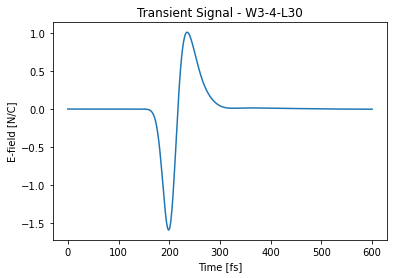

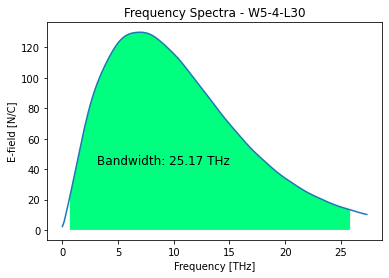

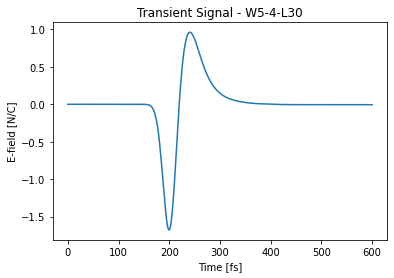

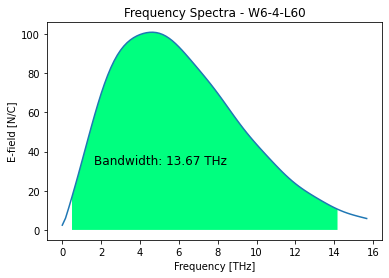

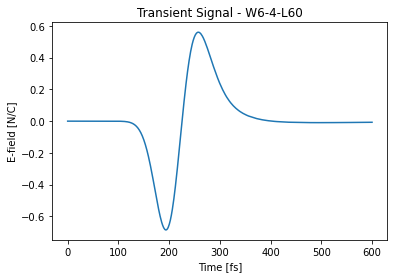

In [5]:
cwd = os.getcwd()

all_results_path = cwd[:-14] + "Full Simulation/Simulation Results/FuPt-closed/" 

data_dicts = []
param_pattern = r"W\d-\d-L\d{2,3}"
signal_params = {"padfactor":9, "n_interpol":1, "dt":1, "bb_fraction": 10}
z = 10**8

for dirpath, dirs, files in os.walk(all_results_path):
    # print(dirpath)
    for f in files:
        if f[-4:] == "json":
            f_path = dirpath + "/" + f
            
            with open(f_path, "r") as j_object:
                results = json.load(j_object)
            E = np.array(results["signal"])
            name = results["name"]
            
            s = Signal(E, signal_params, z, name=name)
            BW_plot_path = dirpath + "/Signal z = 1.00E+08 nm BW.png"
            transient_plot_path = dirpath + "/Signal z = 1.00E+08 nm transient.png"            
            s.plot_BW(BW_plot_path)
            s.plot_signal(transient_plot_path)
            exit()

            
            

            

In [ ]:
parent_dir = "Full Simulation/Simulation Results/FuPt-closed"
/home/hjaleta/spin_project/Full Simulation/Simulation Results/FuPt-closed/W2-3-L30/
for sub in os.listdir(parent_dir):
    json_path = f"{parent_dir}/{sub}/Signal z = 1.00E+08 nm data.json"

In [ ]:
for E in sim.vacuum.E_fields:
    # print(E.Ex)
    signal = Signal(E.Ex, signal_params, E.z, sim.name)
    filepath = "/".join([result_folderpath, f"Signal z = {E.z:.2E} nm "])
    fourier_plot_path = filepath + "spectra.png"
    BW_plot_path = filepath + "BW.png"
    transient_plot_path = filepath + "transient.png"
    json_path = filepath + "data.json"
    signal.plot_BW(BW_plot_path)
    signal.plot_signal(transient_plot_path)
    signal.plot_fourier(fourier_plot_path)
    signal.export_json(json_path)